# <font color = "BLUE"> Projeto 3 - Identificador de pokémons para uma batalha </font>

#### Integrantes do grupo: 

Fernando Elias Sanches
   
Maurício Hiroki Ando


Theo Barbara Rodrigues


<b><font color = "BLUE"> Pergunta a ser respondida: </font></b>

-  <b> Dado um pokémon adversário, quais são os melhores pokémons indicados para a batalha?</b>

## <font color = "BLUE"> Importando os dados </font> 

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

pokedex=pd.read_csv("Pokemon.csv")

#Vamos separar 10 pokémons como teste, para testar o resultado da clusterização
a=pokedex[pokedex.Name=='Chimchar']
b=a.append(pokedex[pokedex.Name=='Infernape'])
c=b.append(pokedex[pokedex.Name=='Palkia'])
d=c.append(pokedex[pokedex.Name=='Darkrai'])
e=d.append(pokedex[pokedex.Name=='Magikarp'])
f=e.append(pokedex[pokedex.Name=='Moltres'])
g=f.append(pokedex[pokedex.Name=='Celebi'])
h=g.append(pokedex[pokedex.Name=='BlastoiseMega Blastoise'])
i=h.append(pokedex[pokedex.Name=='Diglett'])
teste=i.append(pokedex[pokedex.Name=='Spiritomb'])
teste

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
435,390,Chimchar,Fire,NaN,309,44,58,44,58,44,61,4,False
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
549,491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
490,442,Spiritomb,Ghost,Dark,485,50,92,108,92,108,35,4,False


In [2]:
#Como separamos uma parte que será testada pelo cluster, temos que tirá-los do dataframe de análise, que seria o pokedex
#menos o teste. Para remover, podemos observar os "índices numéricos de cada pokémon" 
pokedex=pokedex.drop([435,437,541,549,139,158,271,12,55,490])

## <font color = "BLUE"> Análise inicial os dados </font>

Para análise inicial do dataframe dos pokémons, vamos ver como cada atributo dos status dos pokémons se comportam:

Pokémons disponíveis:790 (lembrando que 10 foram retirados com a finalidade de teste. Logo há 800 dados no total).


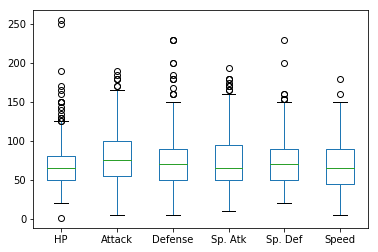

In [3]:
del(pokedex["#"])
del(pokedex["Total"])
del(pokedex["Generation"])
del(pokedex["Legendary"])
pokedex.plot.box();
print("Pokémons disponíveis:{} (lembrando que 10 foram retirados com a finalidade de teste. Logo há 800 dados no total).".format(len(pokedex)))

Nota-se que, através da análise dos atributos de ataque, defesa, velocidade, HP, ataque especial e defesa especial, podemos observar que a grande maioria dos pokémons se encontram dentro do interquantil. Podemos ver que são poucos os pokémons que estão fora da curva em cada atributo, dado que existem cerca de 790 pokémons no dataset do pokedex (mas 800 no total).

Nosso objetivo do projeto é, <b>dado um pokémon adversário, identificar os pokémons mais fortes para a batalha</b>. Assim, nossa análise é sobre grupos de pokémons e análise dos mesmos, isto é, vamos estudar o comportamento "natural" de agrupamento dos pokémons, para identificar quais são parecidos com outros. Desta forma, podemos encontrar o grupo de pokémons mais fortes para uma batalha, em que os pokémons desse grupo são parecidos e esse seria o agrupamento. Logo, a melhor ferramenta para fazer tal análise, é a clusterização. 

## <font color = "BLUE"> Clusterização dos dados </font>

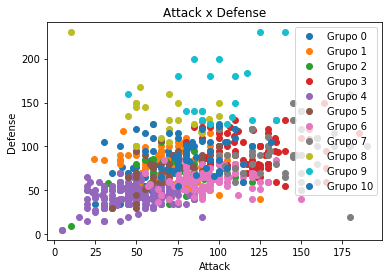

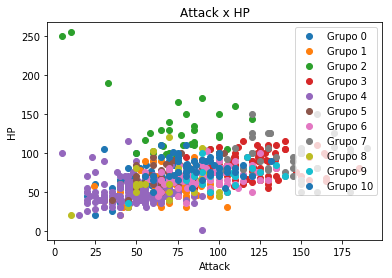

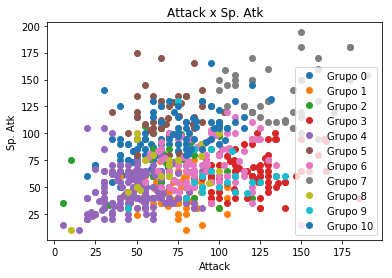

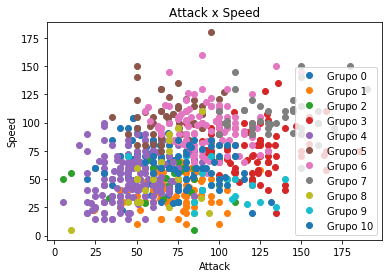

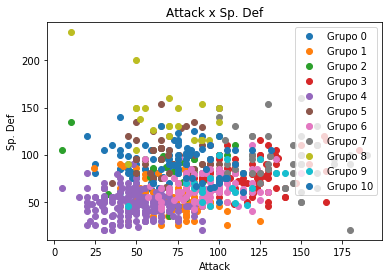

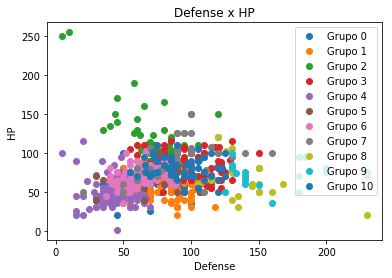

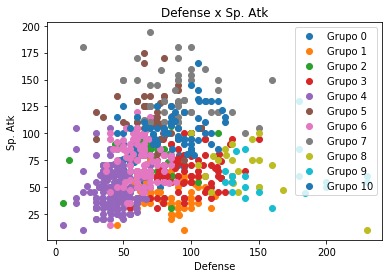

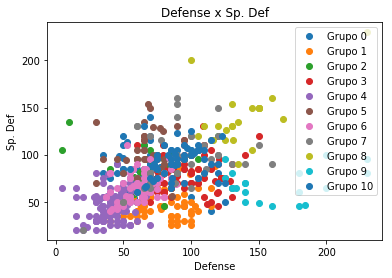

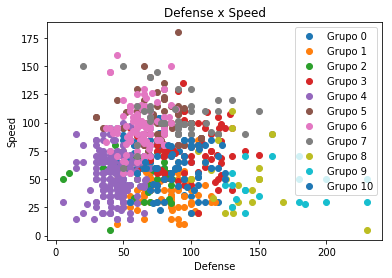

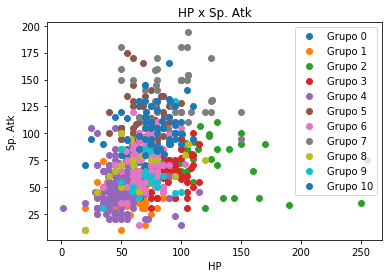

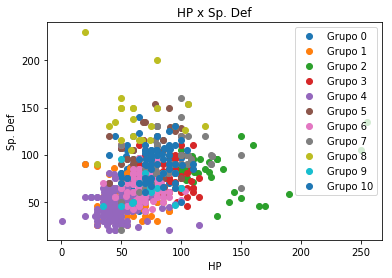

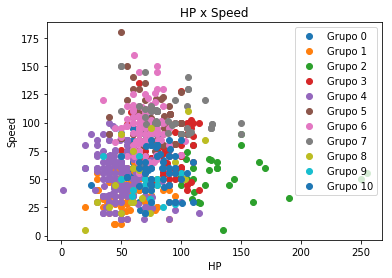

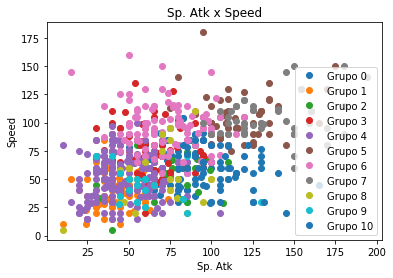

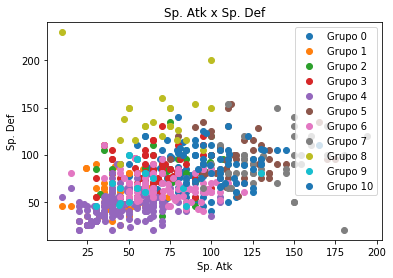

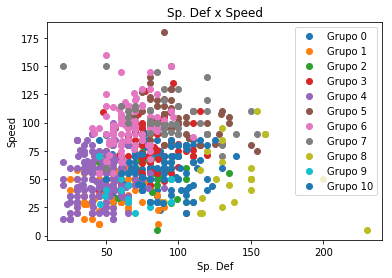

In [4]:
#Código baseado em "clustering_SKL.ipynb" da aula 27

#Atributos dos status para análise: "Attack", "Defense", "Sp. Atk","Sp. Def",'Speed',"HP"

#Como analisaremos o comportamento dos clusters, levando em consideração os 6 atributos dos status dos pokémons, será necessário
#analisar 15 gráficos (combinação de 6 dois a dois). 

dados_entrada = pokedex.loc[:,("Attack", "Defense", "Sp. Atk","Sp. Def",'Speed',"HP")] 

#Com base na análise de que os iniciais tendem a ficar num mesmo grupo, os cães lendários em um mesmo grupo e que alguns pokémons
#Não possuem muita variação na evolução e, portanto, ficariam num mesmo grupo como Weedle e Kakuna, o número ideal de clusters
#São 11 clusters

#Como estávamos com problemas de, a cada run da celula, obtíamos saídas diferentes para pokémons, utilizamos desta solução\
#Baseada no código https://stackoverflow.com/questions/25921762/changes-of-clustering-results-after-each-time-run-in-python-scikit-learn
base = cluster.KMeans(n_clusters=11, init='k-means++', max_iter=100, n_init=1, verbose=0, random_state=3425)

base.fit(dados_entrada)
saida_treinamento = base.predict(dados_entrada)
pokedex['saida'] = saida_treinamento

grupo0 = pokedex[pokedex.saida==0]
grupo1 = pokedex[pokedex.saida==1]
grupo2 = pokedex[pokedex.saida==2]
grupo3 = pokedex[pokedex.saida==3]
grupo4 = pokedex[pokedex.saida==4]
grupo5 = pokedex[pokedex.saida==5]
grupo6 = pokedex[pokedex.saida==6]
grupo7 = pokedex[pokedex.saida==7]
grupo8 = pokedex[pokedex.saida==8]
grupo9 = pokedex[pokedex.saida==9]
grupo10 = pokedex[pokedex.saida==10]

#Comparar de dois a dois (combinação de 6 dois a dois)
def plota_grafico(atributo1, atributo2):
    plt.plot(grupo0["{}".format(atributo1)], grupo0["{}".format(atributo2)], "o", label='Grupo 0')
    plt.plot(grupo1["{}".format(atributo1)], grupo1["{}".format(atributo2)], "o", label='Grupo 1')
    plt.plot(grupo2["{}".format(atributo1)], grupo2["{}".format(atributo2)], "o", label='Grupo 2')
    plt.plot(grupo3["{}".format(atributo1)], grupo3["{}".format(atributo2)], "o", label='Grupo 3')
    plt.plot(grupo4["{}".format(atributo1)], grupo4["{}".format(atributo2)], "o", label='Grupo 4')
    plt.plot(grupo5["{}".format(atributo1)], grupo5["{}".format(atributo2)], "o", label='Grupo 5')
    plt.plot(grupo6["{}".format(atributo1)], grupo6["{}".format(atributo2)], "o", label='Grupo 6')
    plt.plot(grupo7["{}".format(atributo1)], grupo7["{}".format(atributo2)], "o", label='Grupo 7')
    plt.plot(grupo8["{}".format(atributo1)], grupo8["{}".format(atributo2)], "o", label='Grupo 8')
    plt.plot(grupo9["{}".format(atributo1)], grupo9["{}".format(atributo2)], "o", label='Grupo 9') 
    plt.plot(grupo10["{}".format(atributo1)], grupo10["{}".format(atributo2)], "o", label='Grupo 10')
    plt.xlabel("{}".format(atributo1))
    plt.ylabel("{}".format(atributo2))
    plt.title("{} x {}".format(atributo1,atributo2))
    plt.legend()
    plt.show()
plota_grafico("Attack","Defense")
plota_grafico("Attack","HP")
plota_grafico("Attack","Sp. Atk")
plota_grafico("Attack", "Speed")
plota_grafico("Attack","Sp. Def")
plota_grafico("Defense","HP")
plota_grafico("Defense","Sp. Atk")
plota_grafico("Defense","Sp. Def")
plota_grafico("Defense","Speed")
plota_grafico("HP", "Sp. Atk")
plota_grafico("HP","Sp. Def")
plota_grafico("HP", "Speed")
plota_grafico("Sp. Atk","Speed")
plota_grafico("Sp. Atk", "Sp. Def")
plota_grafico("Sp. Def", "Speed")

Após alguns testes com os clusters, encontramos um valor de 11 clusters para análise como um bom parâmetro, pois ele separa bem os pokémons, como por exemplo, alguns iniciais ficam juntos (como charmander, squirtle e bulbasaur). Esses grupos são de fato parecidos e, portanto, foram levados como análise para ver se o número 11 para clusters faz sentido, ou não.

Vale fazer uma nota, em que a cada vez que o programa de cluster é rodado, ele pode alterar as saídas de cada pokémon, isto é, o predict pode dar outros valores para cada "rodagem de código". Por isso, para amenizar o efeito de alteração, foi utilizado o código indicado na célula acima, baseado no Stackoverflow.

In [5]:
pokedex[pokedex.saida==0].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,0
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,0
10,Wartortle,Water,NaN,59,63,80,65,80,58,0
15,Butterfree,Bug,Flying,60,45,50,90,80,70,0
49,Gloom,Grass,Poison,60,65,70,85,75,40,0


In [6]:
pokedex[pokedex.saida==1].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
32,Sandshrew,Ground,NaN,50,75,85,20,30,40,1
35,Nidorina,Poison,NaN,70,62,67,55,55,56,1
38,Nidorino,Poison,NaN,61,72,57,55,55,65,1
51,Paras,Bug,Grass,35,70,55,45,55,25,1
52,Parasect,Bug,Grass,60,95,80,60,80,30,1


In [7]:
pokedex[pokedex.saida==2].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
45,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,2
96,Muk,Poison,NaN,105,105,75,65,100,50,2
121,Chansey,Normal,NaN,250,5,5,35,105,50,2
142,Lapras,Water,Ice,130,85,80,85,95,60,2
145,Vaporeon,Water,NaN,130,65,60,110,95,65,2


In [8]:
pokedex[pokedex.saida==3].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
33,Sandslash,Ground,NaN,75,100,110,45,55,65,3
36,Nidoqueen,Poison,Ground,90,92,87,75,85,76,3
67,Poliwrath,Water,Fighting,90,95,95,70,90,70,3
74,Machamp,Fighting,NaN,90,130,80,65,85,55,3
107,Kingler,Water,NaN,55,130,115,50,50,75,3


In [9]:
pokedex[pokedex.saida==4].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,4
4,Charmander,Fire,NaN,39,52,43,60,50,65,4
9,Squirtle,Water,NaN,44,48,65,50,64,43,4
13,Caterpie,Bug,NaN,45,30,35,20,20,45,4
14,Metapod,Bug,NaN,50,20,55,25,25,30,4


In [10]:
pokedex[pokedex.saida==5].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
6,Charizard,Fire,Flying,78,84,78,109,85,100,5
23,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,5
43,Ninetales,Fire,NaN,73,76,75,81,100,100,5
60,Golduck,Water,NaN,80,82,78,95,80,85,5
69,Kadabra,Psychic,NaN,40,35,30,120,70,105,5


In [11]:
pokedex[pokedex.saida==6].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
18,Beedrill,Bug,Poison,65,90,40,45,80,75,6
19,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,6
22,Pidgeot,Normal,Flying,83,80,75,70,70,101,6
25,Raticate,Normal,NaN,55,81,60,50,70,97,6
27,Fearow,Normal,Flying,65,90,65,61,61,100,6


In [12]:
pokedex[pokedex.saida==7].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
7,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,7
8,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,7
162,Mewtwo,Psychic,NaN,106,110,90,154,90,130,7
163,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,7
164,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,7


In [13]:
pokedex[pokedex.saida==8].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
212,Umbreon,Dark,NaN,95,65,110,60,130,65,8
230,Shuckle,Bug,Rock,20,10,230,10,230,5,8
269,Lugia,Psychic,Flying,106,90,130,90,154,110,8
323,Nosepass,Rock,NaN,30,45,135,45,90,30,8
327,SableyeMega Sableye,Dark,Ghost,50,85,125,85,115,20,8


In [14]:
pokedex[pokedex.saida==9].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
82,Golem,Rock,Ground,80,120,130,55,65,45,9
87,SlowbroMega Slowbro,Water,Psychic,95,75,180,130,80,30,9
98,Cloyster,Water,Ice,50,95,180,85,45,70,9
103,Onix,Rock,Ground,35,45,160,30,45,70,9
220,Forretress,Bug,Steel,75,90,140,60,60,40,9


In [15]:
pokedex[pokedex.saida==10].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
2,Venusaur,Grass,Poison,80,82,83,100,100,80,10
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,10
11,Blastoise,Water,NaN,79,83,100,85,105,78,10
41,Clefable,Fairy,NaN,95,70,73,95,90,60,10
50,Vileplume,Grass,Poison,75,80,85,110,90,50,10


Como já dito antes, o nosso objetivo não é identificar grupos parecidos de acordo com status, mas sim, pokémons parecidos na seguinte situação: dado um pokémon adversário, quais seriam os melhores pokémons para a batalha? Para responder tal pergunta, será necessário encontrar o ponto fraco, ponto forte e ataques sem efeitos de cada pokémon. 

## <font color="BLUE"> Identificando os ponto fracos dos pokémons </font>

In [16]:
#Dado um pokemon, identifica-se seu tipo composto (se tiver um tipo 2, por exemplo, tipo fire e tipo fighting)
def ClassificaTipoComposto(pokemon):
    tipo1=pokedex[pokedex.Name==pokemon]['Type 1'].all()
    tipo2=pokedex[pokedex.Name==pokemon]['Type 2'].all()
    return tipo1,tipo2


#Define o ponto fraco de cada tipo de pokemon. REferencias de fraqueza baseadas no site: https://pokemondb.net/type
def PontoFracoPorTipo(tipo):
    if tipo=='Fairy':
        ponto_fraco=['Poison','Steel']
        ponto_forte=['Fighting','Bug','Dark']
        no_effect=['Dragon']
    elif tipo=='Dragon':
        ponto_fraco=['Ice', 'Fairy', 'Dragon']
        ponto_forte=['Fire', 'Water', 'Electric', 'Grass']
        no_effect=['None']
    elif tipo=='Ground':
        ponto_fraco=['Water','Grass','Ice',]
        ponto_forte=['Poison', 'Rock']
        no_effect=['Electric']
    elif tipo=='Fire':
        ponto_fraco=['Water','Ground','Rock']
        ponto_forte=['Fire','Grass','Ice','Bug','Steel','Fairy']
        no_effect=['None']
    elif tipo=='Flying':
        ponto_fraco=['Electric','Ice','Rock']
        ponto_forte=['Grass','Fighting','Bug']
        no_effect=['Ground']
    elif tipo=='Dark':
        ponto_fraco=['Fighting','Bug','Fairy']
        ponto_forte=['Ghost','Dark']
        no_effect=['Psychic']
    elif tipo=='Ghost':
        ponto_fraco=['Ghost','Dark']
        ponto_forte=['Poison','Bug']
        no_effect=['Normal','Fighting']
    elif tipo=='Psychic':
        ponto_fraco=['Bug','Ghost','Dark']
        ponto_forte=['Fighting','Psychic']
        no_effect=['None']
    elif tipo=='Bug':
        ponto_fraco=['Fire', 'Flying','Rock']
        ponto_forte=['Grass','Fighting','Ground']
        no_effect=['None']
    elif tipo=='Ice':
        ponto_fraco=['Fighting','Fire','Rock','Steel']
        ponto_forte=['Ice']
        no_effect=['None']
    elif tipo=='Electric':
        ponto_fraco=['Ground']
        ponto_forte=['Electric','Steel', 'Flying']
        no_effect=['None']
    elif tipo=='Poison':
        ponto_fraco=['Psychic','Ground']
        ponto_forte=['Grass','Fighting','Poison','Bug','Fairy']
        no_effect=['None']
    elif tipo=='Rock':
        ponto_fraco=['Fighting','Ground','Water','Steel','Grass']
        ponto_forte=['Normal','Fire','Poison','Flying']
        no_effect=['None']
    elif tipo=='Grass':
        ponto_fraco=['Fire','Flying','Ice','Poison','Bug']
        ponto_forte=['Grass','Water','Electric','Ground']
        no_effect=['None']
    elif tipo=='Steel':
        ponto_fraco=['Fire','Fighting','Ground']
        ponto_forte=['Normal','Grass','Ice','Flying','Psychic','Bug','Rock','Dragon','Steel','Fairy']
        no_effect=['Poison']
    elif tipo=='Normal':
        ponto_fraco=['Fighting']
        ponto_forte=['None']
        no_effect=['Ghost']
    elif tipo=='Fighting':
        ponto_fraco=['Flying','Psychic','Fairy']
        ponto_forte=['Bug','Rock','Dark']
        no_effect=['None']
    elif tipo=='Water':
        ponto_fraco=['Grass','Electric']
        ponto_forte=['Water','Ice','Fire','Steel']
        no_effect=['None']
    else:
        ponto_fraco=['None']
        ponto_forte=['None']
        no_effect=['None']
    return ponto_fraco,ponto_forte,no_effect

In [17]:
#Dado um pokemon, retorna-se seu ponto fraco, ponto forte e resistencia
def PontosReais(pokemon):
    tipos=ClassificaTipoComposto(pokemon)
    tipo1=tipos[0]
    tipo2=tipos[1]
    first=PontoFracoPorTipo(tipo1)
    second=PontoFracoPorTipo(tipo2)
    ponto_fraco_temporario=set(first[0]+second[0])
    ponto_forte_temporario=set(first[1]+second[1])
    resistencia=set(first[2]+second[2])
    ponto_fraco_real=[]
    ponto_forte_real=[]
    for elemento in ponto_fraco_temporario:
        if elemento not in second[1]:
            if elemento not in second[2]:
                if elemento not in first[1]:
                    if elemento not in first[2]:
                        ponto_fraco_real.append(elemento)
    for elemento in ponto_forte_temporario:
        if elemento not in second[0]:
            if elemento not in second[2]:
                if elemento not in first[0]:
                    if elemento not in first[2]:
                        ponto_forte_real.append(elemento)
    return ponto_fraco_real, ponto_forte_real,resistencia

In [18]:
#Deleta-se o ataque, Sp. Atk e saida pois estes serão atualizados com a função da célula seguinte
nova_tabela=pokedex.copy()
del(nova_tabela['Attack'])
del(nova_tabela['Sp. Atk'])
del(nova_tabela['saida'])

In [19]:
def Adapta_df(pokemon):
    nome_do_pokemon=(pokedex[pokedex.Name==pokemon])
    Ataque=[]
    Special_ataque=[]
    if len(nome_do_pokemon)!=0:
        weakness=PontosReais(pokemon)[0]
        strength = PontosReais(pokemon)[1]
        super_resistance=PontosReais(pokemon)[2]
        for pocket_monster in nova_tabela.Name:
            tipo1,tipo2=ClassificaTipoComposto(pocket_monster)
            if tipo1 in weakness or tipo2 in weakness:
                Ataque.append(int(pokedex[pokedex['Name']==pocket_monster].Attack)*2)
                Special_ataque.append(int(pokedex[pokedex['Name']==pocket_monster]["Sp. Atk"])*2)
            elif tipo1 in strength or tipo2 in strength:
                Ataque.append(int(pokedex[pokedex['Name']==pocket_monster].Attack)*(1/2))
                Special_ataque.append(int(pokedex[pokedex['Name']==pocket_monster]["Sp. Atk"])*(1/2))
            elif tipo1 in super_resistance or tipo2 in super_resistance:
                Ataque.append(0)
                Special_ataque.append(0)
            else:
                Ataque.append(int(pokedex[pokedex['Name']==pocket_monster].Attack))
                Special_ataque.append(int(pokedex[pokedex['Name']==pocket_monster]["Sp. Atk"]))
        nova_tabela['Attack']=Ataque
        nova_tabela['Sp. Atk']=Special_ataque
        return nova_tabela
    else:
        return("Pokémon não encontrado. Verifique se a escrita está correta.")

In [20]:
def Cluster (tabela):
    dados_entrada = tabela.loc[:,("Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "HP")] #Estamos agrupando os dados com base nos status
    ten_means = cluster.KMeans(n_clusters=11, init='k-means++', max_iter=100, n_init=1, verbose=0, random_state=3425)
    ten_means.fit(dados_entrada)
    saida = ten_means.predict(dados_entrada)
    tabela['saida'] = saida
    return tabela


In [21]:
#Resultado final obtido
#Devolvendo o melhor grupo de pokémons para batalhar com um pokémon a escolha do leitor:
pokemon = input("Qual seu pokémon adversário? ")
tabela = Adapta_df(pokemon) #atualiza a tabela de acordo com os pontos fortes, pontos fracos e ataques sem efeitos

try:
    tabela_cluster = Cluster(tabela) #Clusteriza a tabela atualizada
    grupo_repetido=[]
    grupo_solo=[]
    ataque_max = tabela_cluster.sort_values(by="Attack")["Attack"].max() #Identifica o pokémon com maior ataque
    saida_do_pokemon=list(tabela_cluster[tabela_cluster.Attack==ataque_max].saida)#Identifica a qual cluster o pokémon forte pertence
    if len(saida_do_pokemon)!=0:
        for element in tabela_cluster.saida:
            if element == int(saida_do_pokemon[0]):
                nome_real = tabela_cluster[tabela_cluster["saida"]==element].Name
                grupo_repetido.append(nome_real)
        for p in grupo_repetido[0]:
            grupo_solo.append(p)
        print("Os melhores pokémons contra {} são: {}".format(pokemon, grupo_solo))
    else:
        print("Esse pokémon não existe ou o nome foi digitado de forma incorreta ou ainda ele foi reservado para a parte teste.")
except AttributeError:
    print("Esse pokémon não existe ou o nome foi digitado de forma incorreta ou ainda ele foi reservado para a parte teste.")

Qual seu pokémon adversário? Metapod
Os melhores pokémons contra Metapod são: ['CharizardMega Charizard X', 'CharizardMega Charizard Y', 'Flareon', 'Dragonite', 'Tyranitar', 'TyranitarMega Tyranitar', 'Ho-oh', 'Blaziken', 'BlazikenMega Blaziken', 'CameruptMega Camerupt', 'Salamence', 'SalamenceMega Salamence', 'GroudonPrimal Groudon', 'Rayquaza', 'RayquazaMega Rayquaza', 'Honchkrow', 'Emboar', 'Archeops', 'TornadusIncarnate Forme', 'ThundurusIncarnate Forme', 'ThundurusTherian Forme', 'Reshiram', 'LandorusIncarnate Forme', 'LandorusTherian Forme', 'Yveltal', 'DiancieMega Diancie', 'Volcanion']


### <font color= "GREEN"> Analisando a parte teste com cluster

Analisamos todo o dataset com clusterização de 790 pokémons. Por que tínhamos separado 10 pokémons, ou ainda, pokémons para a parte teste? Isso é utilizado para validar nossa clusterização , ou ainda, dizer se ele é eficaz ou não. Para isso, devemos classificar esses 10 pokémons. 

In [22]:
#Classificando os pokémons
entrada_teste=teste.loc[:,("Attack", "Defense", "Sp. Atk","Sp. Def",'Speed',"HP")] 
saida_teste=base.predict(entrada_teste)
teste['saida']=saida_teste
teste

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
435,390,Chimchar,Fire,NaN,309,44,58,44,58,44,61,4,False,4
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False,6
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True,7
549,491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True,5
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False,4
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,5
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False,5
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False,10
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False,4
490,442,Spiritomb,Ghost,Dark,485,50,92,108,92,108,35,4,False,10


Comparando as saidas do teste e trainamento (pokedex), pode-se dizer que:

<b><font color = "RED"> Grupo 4</b>

In [23]:
pokedex.loc[[0,4,9,166,169,172,272,276,280,432,438,554,557,560,718,721,724],:]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,4
4,Charmander,Fire,NaN,39,52,43,60,50,65,4
9,Squirtle,Water,NaN,44,48,65,50,64,43,4
166,Chikorita,Grass,NaN,45,49,65,49,65,45,4
169,Cyndaquil,Fire,NaN,39,52,43,60,50,65,4
172,Totodile,Water,NaN,50,65,64,44,48,43,1
272,Treecko,Grass,NaN,40,45,35,65,55,70,4
276,Torchic,Fire,NaN,45,60,40,70,50,45,4
280,Mudkip,Water,NaN,50,70,50,50,50,40,4
432,Turtwig,Grass,NaN,55,68,64,45,55,31,1


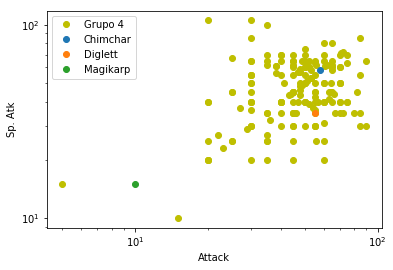

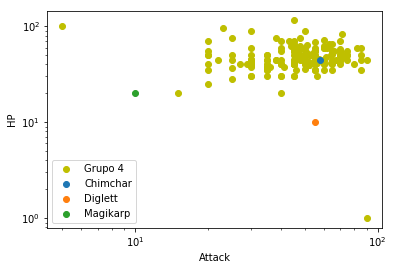

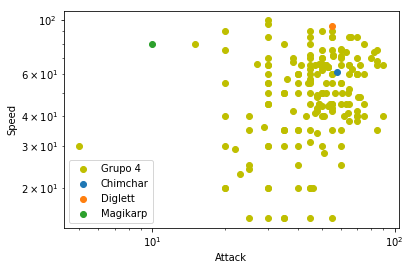

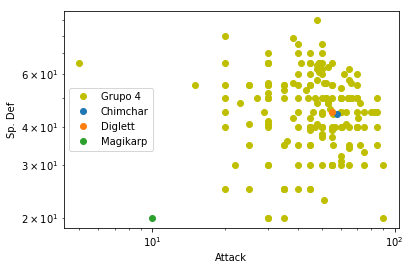

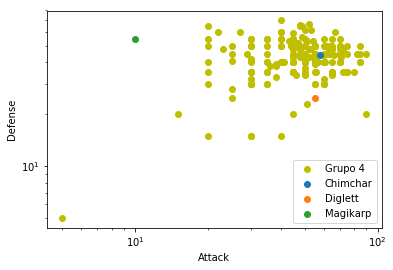

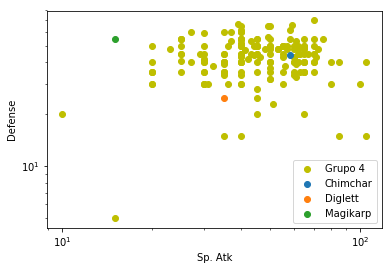

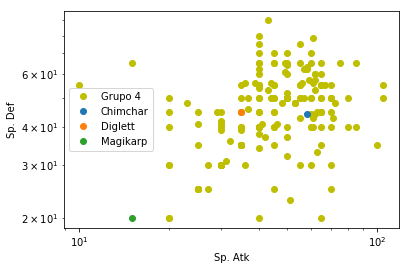

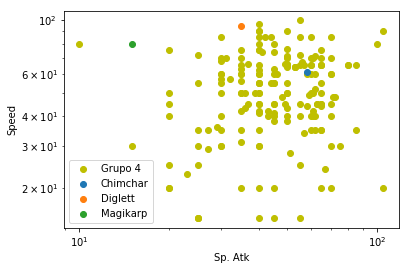

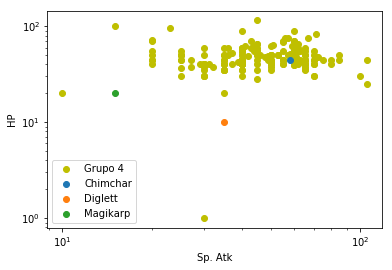

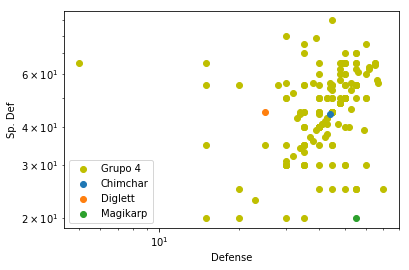

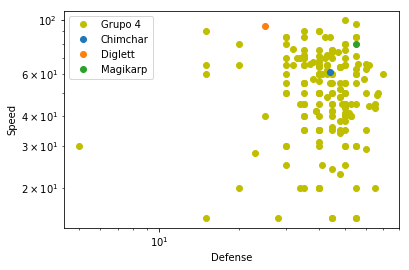

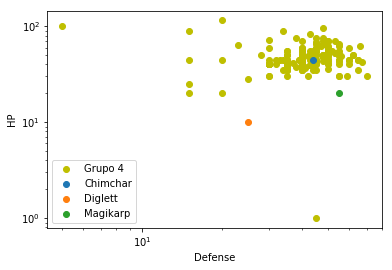

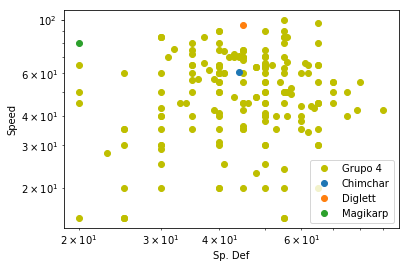

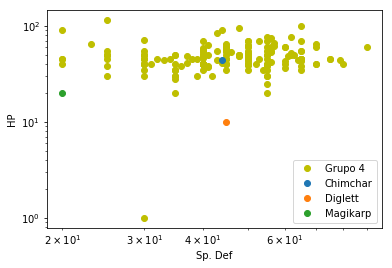

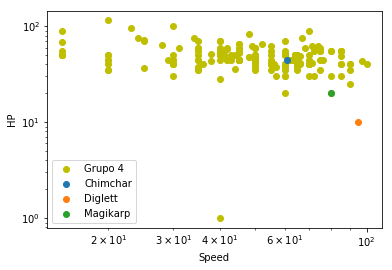

In [24]:
def comparacao(lista, at1,at2,s):
    plt.plot(pokedex[pokedex.saida==s][at1],pokedex[pokedex.saida==s][at2],"yo", label="Grupo {}".format(s))
    for pokemon in lista:
        plt.plot(teste[teste.Name==pokemon][at1],teste[teste.Name==pokemon][at2],"o", label="{}".format(pokemon))
    plt.xlabel('{}'.format(at1))
    plt.ylabel('{}'.format(at2))
    plt.loglog()
    plt.legend()
    plt.show()
comparacao(['Chimchar','Diglett','Magikarp'], 'Attack', 'Sp. Atk',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Attack', 'HP',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Attack', 'Speed',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Attack', 'Sp. Def',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Attack', 'Defense',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Sp. Atk', 'Defense',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Sp. Atk', 'Sp. Def',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Sp. Atk', 'Speed',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Sp. Atk', 'HP',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Defense','Sp. Def',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Defense','Speed',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Defense','HP',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Sp. Def','Speed',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Sp. Def','HP',4)
comparacao(['Chimchar','Diglett','Magikarp'], 'Speed','HP',4)

 - Chimchar está no grupo onde a maioria dos iniciais se encontram e, portanto, faz sentido ele pertencer ao grupo 4. Analisando os gráficos, ainda, observa-se que Chimchar realmente está dentro do grupo, através da análise de seus status com o dos pokémons do grupo 4;
 - Diglet também está no grupo 4 e, por conta de seus status e dele ser a primeira evolução, também faz sentido ele pertencer ao grupo 4. No entanto, pode-se dizer que, com uma visão sobre o jogo do Pokémon, Diglett é mais fraco que os iniciais, mas ainda é próximo dos mesmos. Analisando os gráficos, vemos que na maioria deles, Diglett possui status parecido com o grupo (com algumas exceções), mas ainda o faz pertencer ao grupo;
 - Magikarp é um pokémon considerávelmente fraco, inclusive um dos mais fracos do jogo. Embora ele seja primeira evolução, ele possui status baixo e, portanto, não faria muito sentido ele pertencer ao grupo 4. Como podemos observar, ainda, nos gráficos, na maioria deles, Magikarp está bem deslocado com relação ao centro e, portanto, pode-se reforçar a ideia de que Magikarp não pretence ao grupo 4. 

<b> <font color = "RED"> Grupo 6 </b>

In [25]:
pokedex[pokedex.saida==6].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
18,Beedrill,Bug,Poison,65,90,40,45,80,75,6
19,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,6
22,Pidgeot,Normal,Flying,83,80,75,70,70,101,6
25,Raticate,Normal,NaN,55,81,60,50,70,97,6
27,Fearow,Normal,Flying,65,90,65,61,61,100,6


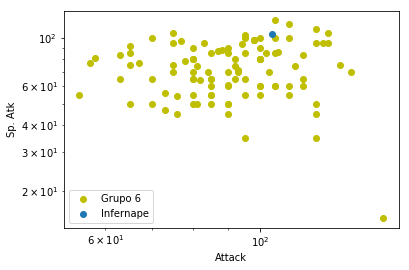

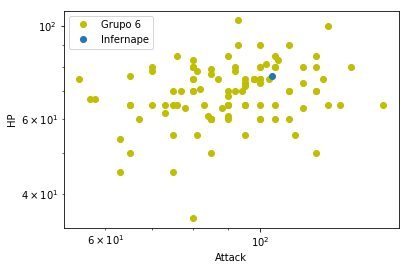

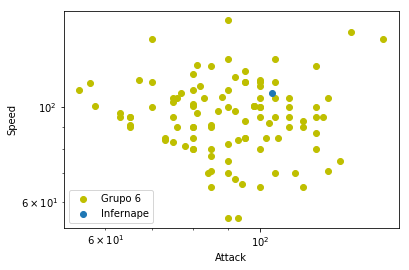

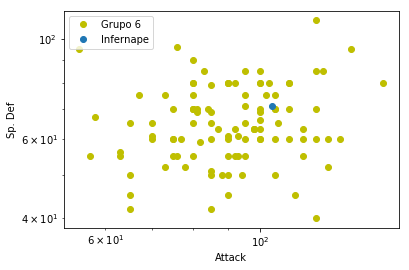

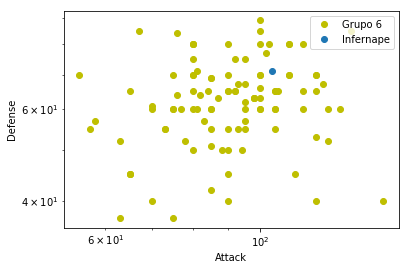

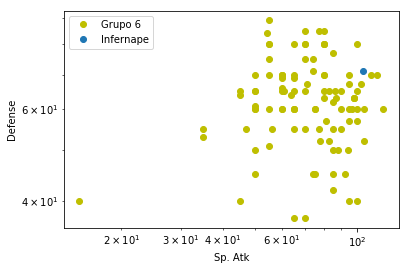

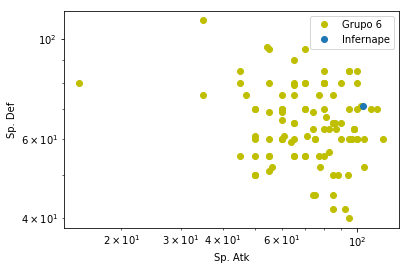

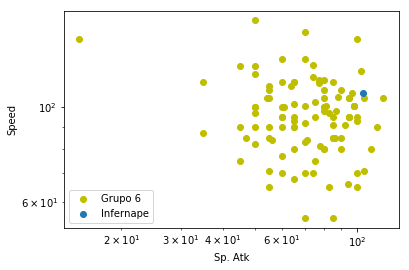

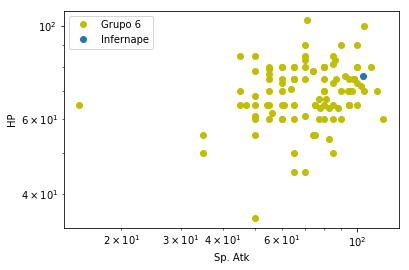

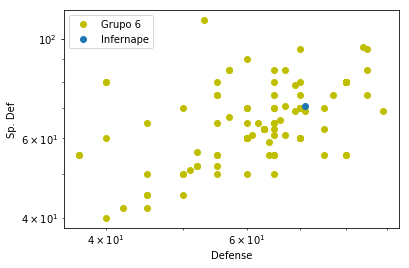

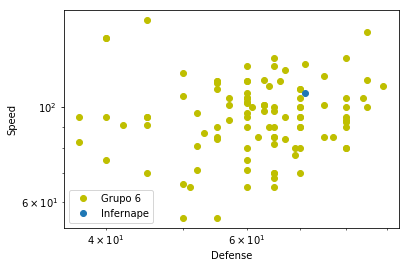

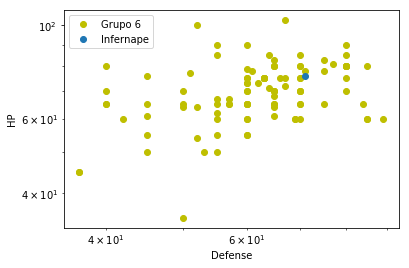

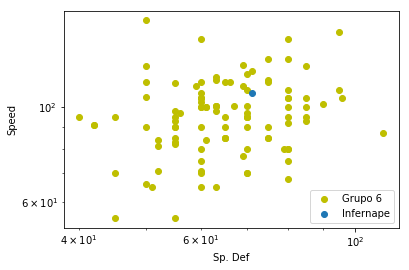

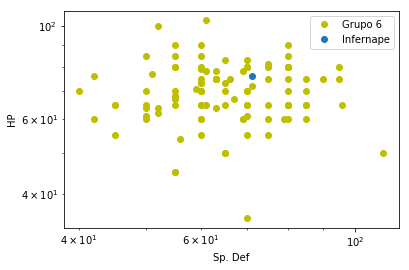

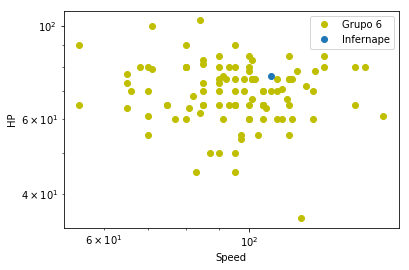

In [26]:
comparacao(['Infernape'], 'Attack', 'Sp. Atk',6)
comparacao(['Infernape'], 'Attack', 'HP',6)
comparacao(['Infernape'], 'Attack', 'Speed',6)
comparacao(['Infernape'], 'Attack', 'Sp. Def',6)
comparacao(['Infernape'], 'Attack', 'Defense',6)
comparacao(['Infernape'], 'Sp. Atk', 'Defense',6)
comparacao(['Infernape'], 'Sp. Atk', 'Sp. Def',6)
comparacao(['Infernape'], 'Sp. Atk', 'Speed',6)
comparacao(['Infernape'], 'Sp. Atk', 'HP',6)
comparacao(['Infernape'], 'Defense','Sp. Def',6)
comparacao(['Infernape'], 'Defense','Speed',6)
comparacao(['Infernape'], 'Defense','HP',6)
comparacao(['Infernape'], 'Sp. Def','Speed',6)
comparacao(['Infernape'], 'Sp. Def','HP',6)
comparacao(['Infernape'], 'Speed','HP',6)

 - Infernape é um pokémon considerávelmente forte. Nem todos as últimas evoluções dos pokémons iniciais são fortes ou pelo menos igualmente fortes. O grupo 6, no entanto, não tem uma maioria muito forte, mas com status não muito distantes de Infernape. Como pode-se analisar nos gráficos acima, Infernape está bem alocado no grupo 6.

<b><font color = "RED"> Grupo 7 </b>

In [27]:
pokedex[pokedex.saida==7].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
7,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,7
8,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,7
162,Mewtwo,Psychic,NaN,106,110,90,154,90,130,7
163,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,7
164,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,7


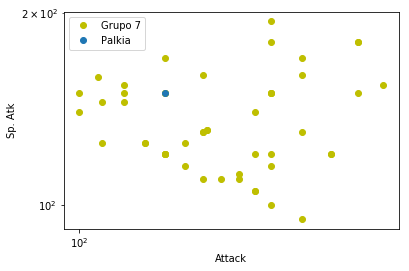

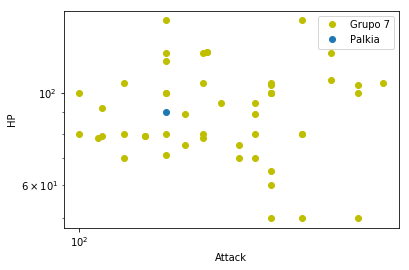

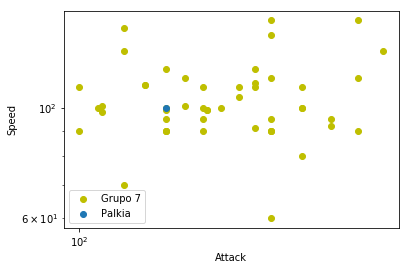

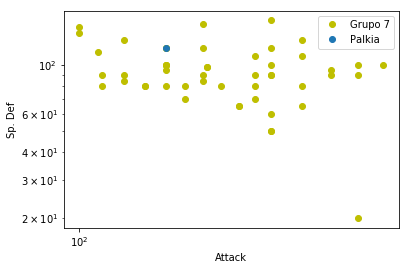

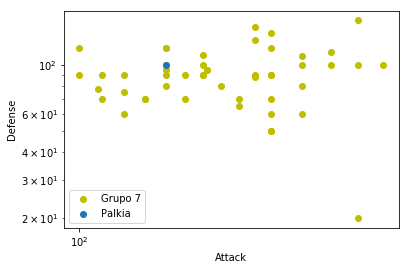

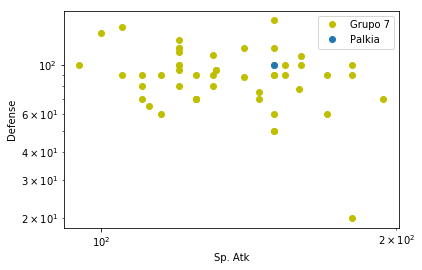

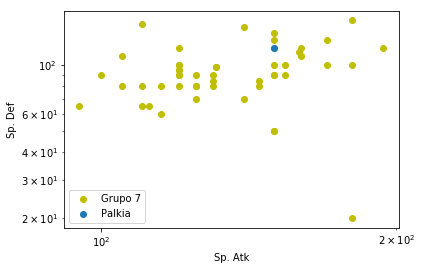

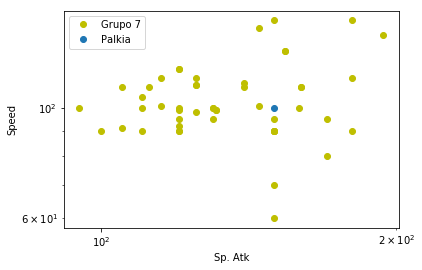

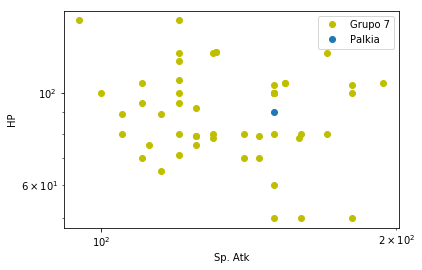

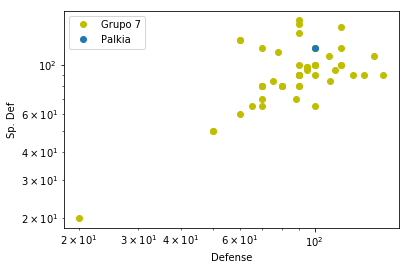

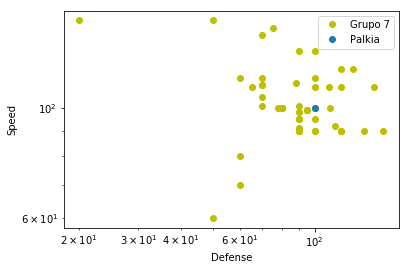

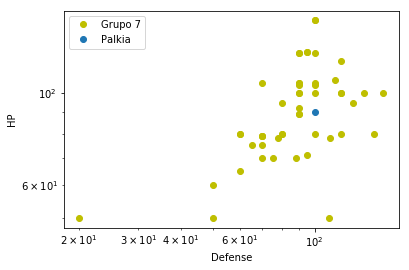

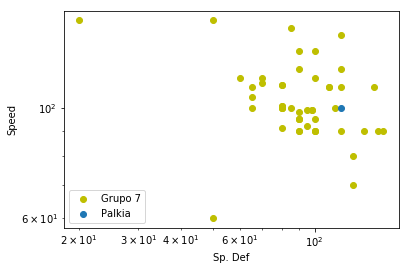

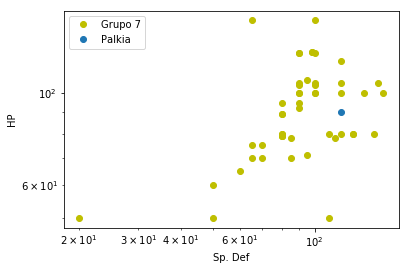

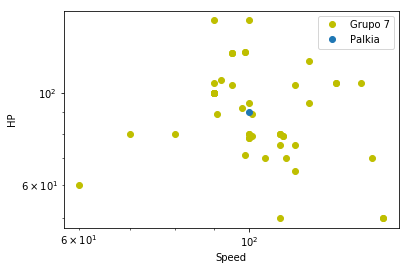

In [28]:
comparacao(['Palkia'], 'Attack', 'Sp. Atk',7)
comparacao(['Palkia'], 'Attack', 'HP',7)
comparacao(['Palkia'], 'Attack', 'Speed',7)
comparacao(['Palkia'], 'Attack', 'Sp. Def',7)
comparacao(['Palkia'], 'Attack', 'Defense',7)
comparacao(['Palkia'], 'Sp. Atk', 'Defense',7)
comparacao(['Palkia'], 'Sp. Atk', 'Sp. Def',7)
comparacao(['Palkia'], 'Sp. Atk', 'Speed',7)
comparacao(['Palkia'], 'Sp. Atk', 'HP',7)
comparacao(['Palkia'], 'Defense','Sp. Def',7)
comparacao(['Palkia'], 'Defense','Speed',7)
comparacao(['Palkia'], 'Defense','HP',7)
comparacao(['Palkia'], 'Sp. Def','Speed',7)
comparacao(['Palkia'], 'Sp. Def','HP',7)
comparacao(['Palkia'], 'Speed','HP',7)

 - Palkia está no grupo 7 e faz muito sentido dele pertencer ao grupo. Este grupo é o que mais tem lendários e os pokémons mais fortes do jogo. De certo, Palkia é um pokémon lendário e um dos mais fortes também. Isso também pode ser observado nos gráficos, em que Palkia está em pontos cuja região está cercada por mais pontos, isto é, ele não está mal alocado.

<b><font color = "RED"> Grupo 5 </b>

In [29]:
pokedex[pokedex.saida==5].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
6,Charizard,Fire,Flying,78,84,78,109,85,100,5
23,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,5
43,Ninetales,Fire,NaN,73,76,75,81,100,100,5
60,Golduck,Water,NaN,80,82,78,95,80,85,5
69,Kadabra,Psychic,NaN,40,35,30,120,70,105,5


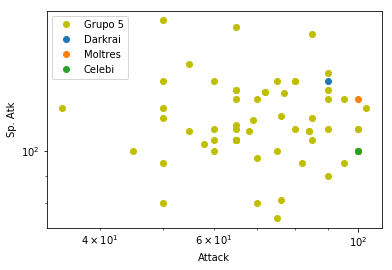

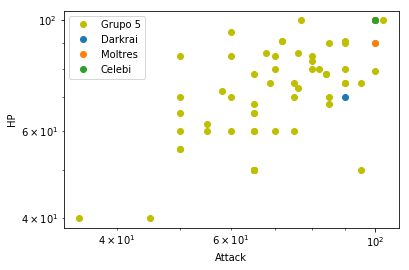

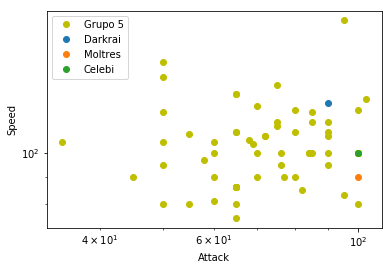

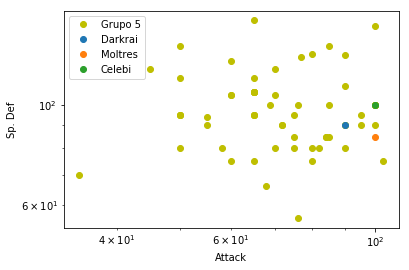

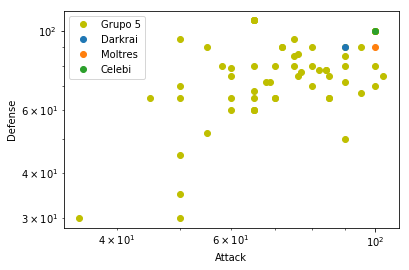

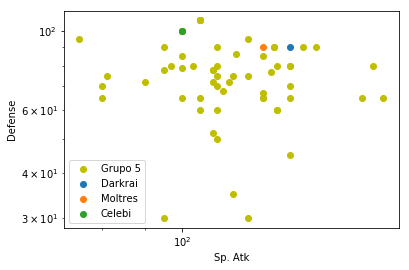

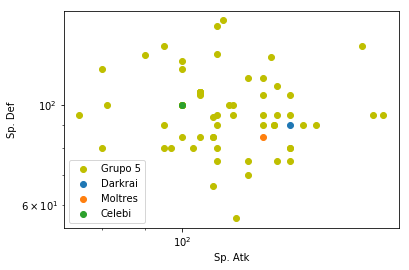

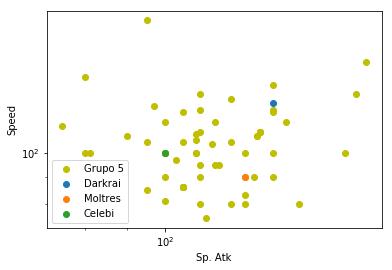

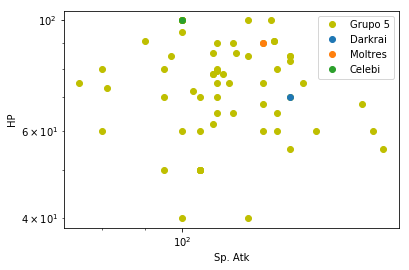

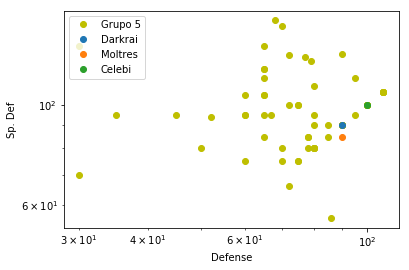

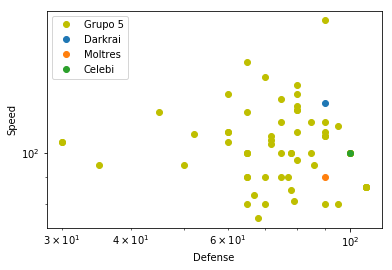

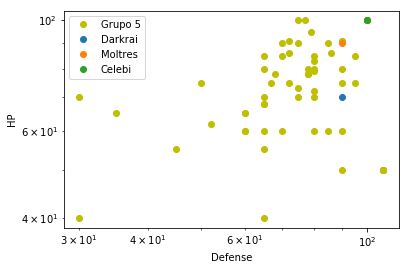

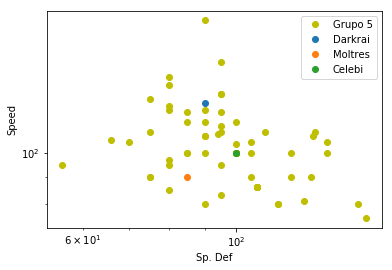

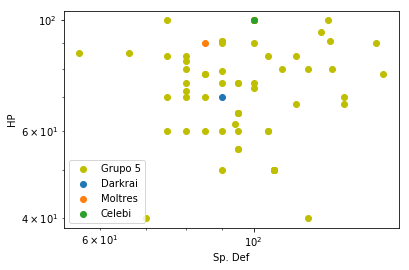

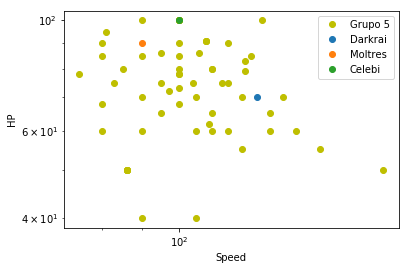

In [30]:
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Attack', 'Sp. Atk',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Attack', 'HP',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Attack', 'Speed',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Attack', 'Sp. Def',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Attack', 'Defense',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Sp. Atk', 'Defense',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Sp. Atk', 'Sp. Def',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Sp. Atk', 'Speed',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Sp. Atk', 'HP',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Defense','Sp. Def',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Defense','Speed',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Defense','HP',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Sp. Def','Speed',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Sp. Def','HP',5)
comparacao(['Darkrai', 'Moltres', 'Celebi'], 'Speed','HP',5)

 - Tanto Darkrai, Moltres e Celebi são pokémons únicos, sendo os dois primeiros, lendários. Pelo grupo, existem pokémons relativamente fortes, mas não tanto quando comparados ao grupo 7. Embora Moltres seja lendário, ele não é tão forte ao ponto de pertencer ao grupo 7 e, portanto, faz sentido ele pertencer a este; tanto que Zapdos também está presente neste grupo. Já Darkrai, embora seja muito forte em termos de poder (possui um dos poderes mais fortes do jogo que é o Dark Hole), em termo de status, ele se equipara a este grupo também. Celebi é um caso especial em que, embora seja pequeno e aparenta ser fraco, ele é forte também, mas não chega ao ponto de pertencer ao grupo 7. Logo, faz sentido os três pokémons pertencerem a este grupo. Como pode ser observado nos gráficos, ainda, nota-se que os três são de fato um pouco afastados da maioria do grupo, mas ainda próximos dos "centros", o que mostra o pertencimento desses três pokémons ao grupo 5. 

<b><font color = "RED"> Grupo 10 </b>

In [31]:
pokedex[pokedex.saida==10]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,saida
2,Venusaur,Grass,Poison,80,82,83,100,100,80,10
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,10
11,Blastoise,Water,NaN,79,83,100,85,105,78,10
41,Clefable,Fairy,NaN,95,70,73,95,90,60,10
50,Vileplume,Grass,Poison,75,80,85,110,90,50,10
86,Slowbro,Water,Psychic,95,75,110,100,80,30,10
89,Magneton,Electric,Steel,50,60,95,120,70,70,10
111,Exeggutor,Grass,Psychic,95,95,85,125,65,55,10
118,Weezing,Poison,NaN,65,90,120,85,70,60,10
150,Omastar,Rock,Water,70,60,125,115,70,55,10


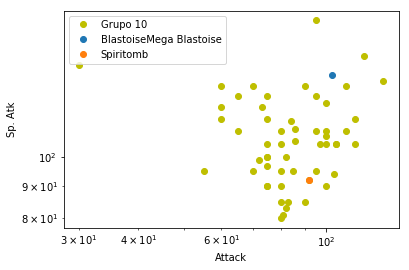

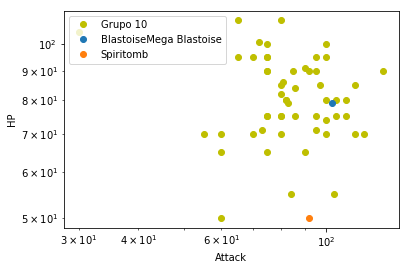

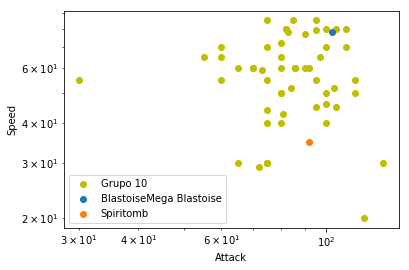

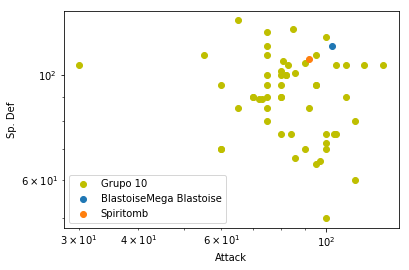

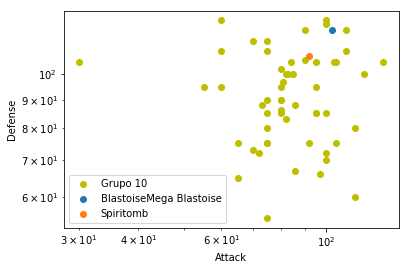

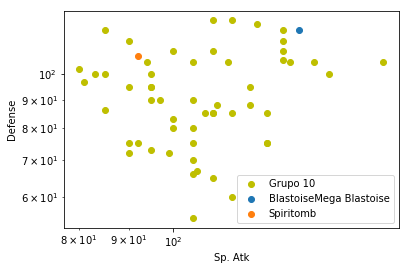

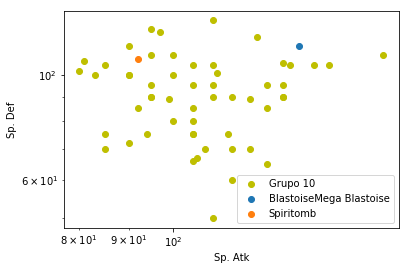

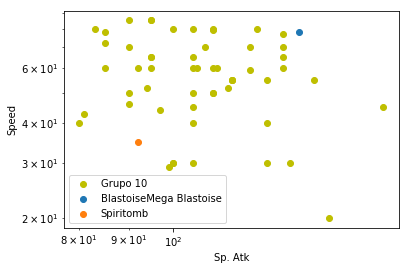

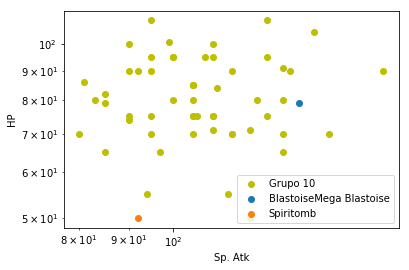

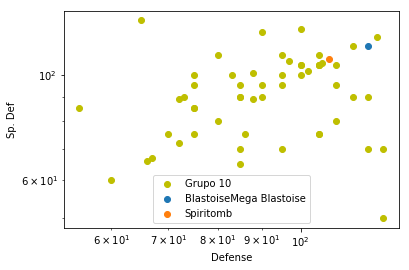

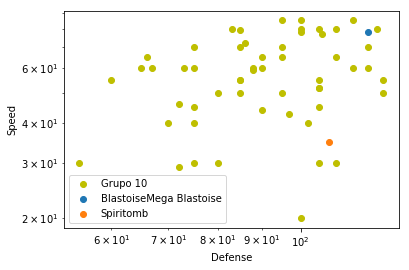

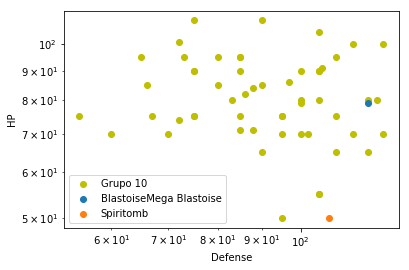

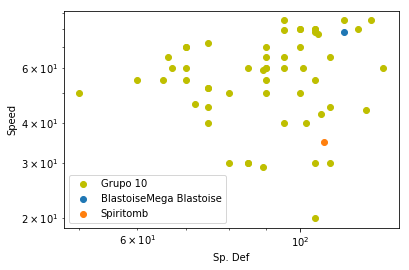

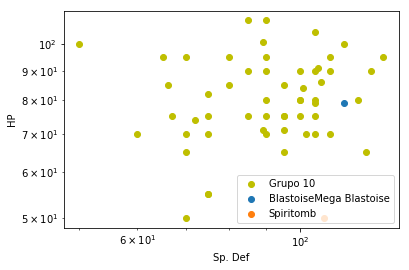

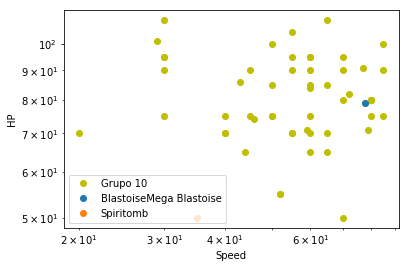

In [32]:
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Attack', 'Sp. Atk',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Attack', 'HP',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Attack', 'Speed',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Attack', 'Sp. Def',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Attack', 'Defense',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Sp. Atk', 'Defense',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Sp. Atk', 'Sp. Def',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Sp. Atk', 'Speed',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Sp. Atk', 'HP',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Defense','Sp. Def',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Defense','Speed',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Defense','HP',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Sp. Def','Speed',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Sp. Def','HP',10)
comparacao(['BlastoiseMega Blastoise', 'Spiritomb'], 'Speed','HP',10)

 - Mega Blastoise e Spiritomb são dois pokémons também fortes, mas não muito rápidos. É notável que no grupo, estão presentes pokémons como Venusaur, Blastoise, Mega Venusaur, Empoleon que são evoluções finais de aluns pokémons iniciais, mas que não são muito rápidos. Há até outros pokémons mega no grupo, que são comparáveis neste grupo. Para Spiritomb, também existem pokémons de mesmo calibre e, portanto, faz sentido ambos estarem neste grupo. A maioria dos gráficos mostram a semelhança presente entre o grupo e esses dois pokémons. Como já dito, analisando no jogo do pokémon, são pokémons aceitáveis de se dizer que são parecidos. 

## <font color = "BLUE"> Conclusão 

Conclui-se, então, que o classificador via cluster do nosso projeto é razoavelmente bom, pois ele possui um acerto de 90% (considerando que foram testados apenas 10 pokémons de 800). Com base nessa acurácia, podemos dizer que o usuário teria confiança de utilizar nosso programa para sua decisão em um batalha. Porém, não afirmamos que o nosso classificador está perfeito, pois ainda podemos melhorá-lo, como por exemplo, classificar corretamente o Magikarp. Justamente por se tratar de um cluster, nós que adotamos um grau de semelhança (demonstrado pelo número de grupos criados pelo cluster). Logo, há espaço para questionamento sobre certos pokémons classificados. 

Podemos melhorar o classificador, aumentando o dataset de analise incluindo, por exemplo, pokémons da região de Alola. Podemos testar outros números de clusters com ou sem randomização no predict (este é um ponto que foi levantado na célula de código da primeira clusterização, em que a randomização pode alterar os pokémons de alguns grupos, devido a saída diferente gerada pelo predict). Vale ressaltar, que o grau de semelhança ou se um pokémon se parece com outro ou ainda se faz sentido um pokémon pertencer a um grupo, varia de pessoa para pessoa. Assim, mesmo que tenhamos encontrado um número ideal de 11 clusters, outras pessoas poderiam ter outras opiniões com número de clusters diferentes. No entanto, se adotarmos um número de clusters muito alto, a classificação acaba ficando distorcida e muito específica, podendo até seperar pokemons que são de fato parecidos, devido a um status levemente diferente, podendo devolver poucas opções de pokémons e talvez desconsiderar um que seria ideal para a batalha. Por outro lado, se adotarmos um número de clusters muito baixo, o classificador junta pokémons parecidos junto com alguns que têm atributos bem distintos, sendo muito pouco específico, devolvendo pokémons que não seriam ideais para a batalha. Assim, o ideal seria mexer no número sem extrapolar muito.